<a href="https://colab.research.google.com/github/ucefk/ALCAndroidChallenge/blob/master/Models/model_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

import pickle

import os

import random

from google.colab import drive

# **Mounting Drive**

In [ ]:
drive.mount('/gdrive')
os.symlink('/gdrive/My Drive', '/content/gdrive')

Mounted at /gdrive


# **Import Data**

## **Process data**
Create own data distribution (with own shuffle)

In [ ]:
# setting the path to the pickle files saved  (grayscale images)
benign_link = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/benign.pickle"

malign_link = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/malign.pickle"

In [ ]:
# opening pickle files (grayscale images)
pickle_in = open(benign_link, "rb")
benign_data = pickle.load(pickle_in)

pickle_in = open(malign_link, "rb")
malign_data = pickle.load(pickle_in)

In [ ]:
# shuffle the data
random.shuffle(benign_data)
random.shuffle(malign_data)

In [ ]:
# splitting and merging the data from benign and malign arrays

# split eg. train_per = 0.7 --> 70% train data, 30% test data
train_per = 0.7

trn_b = int(len(benign_data) * train_per)

trn_m = int(len(malign_data) * train_per)

train_data = benign_data[: trn_b].copy() + malign_data[: trn_m].copy()

test_data = benign_data[trn_b :].copy() + malign_data[trn_m :].copy()

In [ ]:
# shuffle train and test data
random.shuffle(train_data)
random.shuffle(test_data)

In [ ]:
assert len(train_data + test_data) == len(benign_data + malign_data)

In [ ]:
# separating the features and labels

X_train = []
y_train = []

X_test = []
y_test = []

for X, y in train_data:
  X_train.append(X)
  y_train.append(y)

for X, y in test_data:
  X_test.append(X)
  y_test.append(y)


In [ ]:
# reshaping 

num_channels = 1 # depend whether you're using rgb or grayscale images

IMG_SIZE = len(X_train[0])

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, num_channels)

y_train = np.array(y_train).reshape(-1)

IMG_SIZE = len(X_test[0])

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, num_channels)

y_test = np.array(y_test).reshape(-1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

**Scaling**

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

## **Import processed data**
Use the same data distribution

In [ ]:
# setting the path to the pickle files saved  (grayscale images)
X_train_link = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/X_train.pickle"

y_train_link = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/y_train.pickle"

X_test_link = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/X_test.pickle"

y_test_link = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/y_test.pickle"

In [ ]:
pickle_in = open(X_train_link, "rb")
X_train = pickle.load(pickle_in)

pickle_in = open(y_train_link, "rb")
y_train = pickle.load(pickle_in)

pickle_in = open(X_test_link, "rb")
X_test = pickle.load(pickle_in)

pickle_in = open(y_test_link, "rb")
y_test = pickle.load(pickle_in)

# **Setting up models**

In [ ]:
num_channels = 1

### **model**

In [ ]:
model = tf.keras.models.Sequential(
    [
     
     Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(100,100,num_channels)),
     MaxPooling2D(2,2),

     Conv2D(16, (3,3), padding='same', activation='relu'),
     MaxPooling2D(2,2),

     Conv2D(32, (3,3), padding='same', activation='relu'),
     MaxPooling2D(2,2),

     Conv2D(64, (3,3), padding='same', activation='relu'),
     MaxPooling2D(2,2),

     Flatten(),

     Dense(256, activation='relu'),

     Dropout(0.4),

     Dense(1, activation='sigmoid')
     
    ]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 8)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        1

In [ ]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [ ]:
result = model.fit(
    x = X_train,
    y = y_train,
    batch_size = 32,
    epochs = 100,
    validation_split = 0.3,
    verbose = 2
)

Epoch 1/100
62/62 - 12s - loss: 0.6216 - acc: 0.6554 - val_loss: 0.5473 - val_acc: 0.7422
Epoch 2/100
62/62 - 12s - loss: 0.5376 - acc: 0.7578 - val_loss: 0.5231 - val_acc: 0.7745
Epoch 3/100
62/62 - 12s - loss: 0.4883 - acc: 0.7819 - val_loss: 0.4680 - val_acc: 0.7864
Epoch 4/100
62/62 - 12s - loss: 0.4559 - acc: 0.8008 - val_loss: 0.4363 - val_acc: 0.8138
Epoch 5/100
62/62 - 12s - loss: 0.3904 - acc: 0.8300 - val_loss: 0.4251 - val_acc: 0.8210
Epoch 6/100
62/62 - 12s - loss: 0.3872 - acc: 0.8321 - val_loss: 0.4104 - val_acc: 0.8150
Epoch 7/100
62/62 - 12s - loss: 0.3391 - acc: 0.8612 - val_loss: 0.3777 - val_acc: 0.8365
Epoch 8/100
62/62 - 12s - loss: 0.3082 - acc: 0.8781 - val_loss: 0.4126 - val_acc: 0.8353
Epoch 9/100
62/62 - 12s - loss: 0.3022 - acc: 0.8761 - val_loss: 0.3955 - val_acc: 0.8150
Epoch 10/100
62/62 - 12s - loss: 0.3690 - acc: 0.8382 - val_loss: 0.3469 - val_acc: 0.8640
Epoch 11/100
62/62 - 12s - loss: 0.2933 - acc: 0.8781 - val_loss: 0.3381 - val_acc: 0.8568
Epoch 12

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


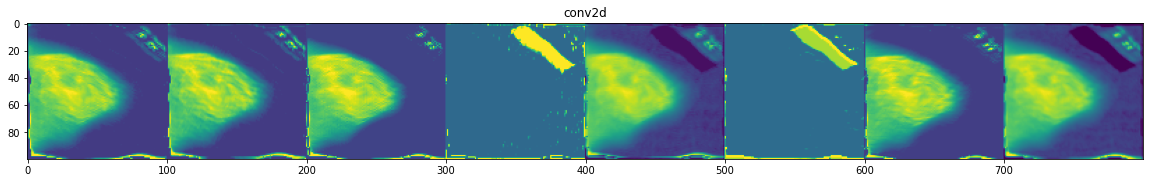

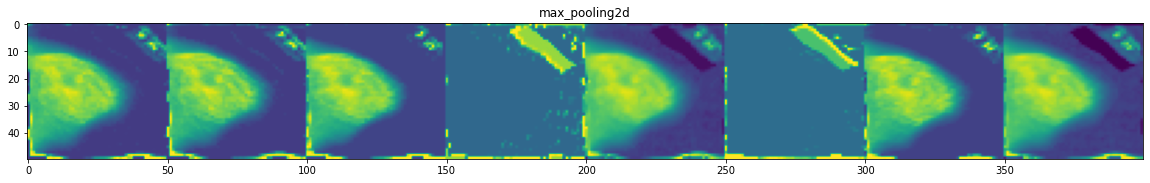

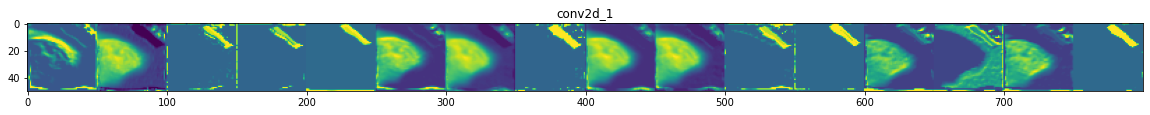

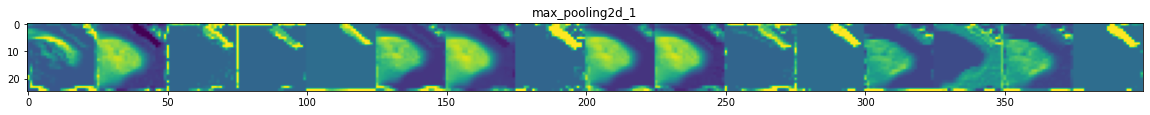

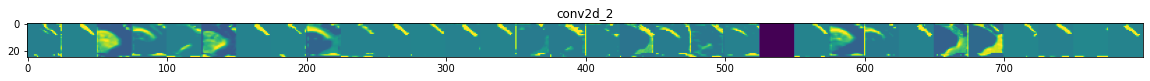

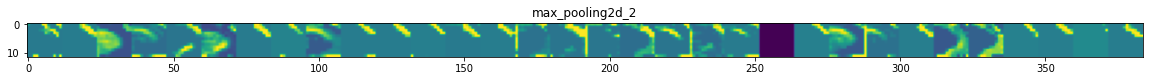

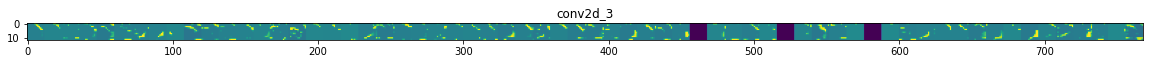

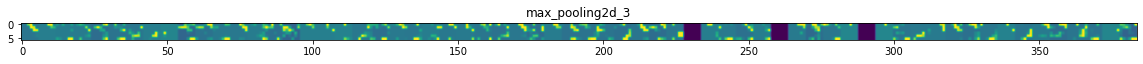

In [ ]:
outputs = [layer.output for layer in model.layers[0:]]

model_vis = tf.keras.models.Model(inputs = model.input, outputs = outputs)

x = random.choice(X_test)
x   = x.reshape((1,) + x.shape)

feature_maps = model_vis.predict(x)

layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, feature_maps):
  
  if len(feature_map.shape) == 4:
    
    n_features = feature_map.shape[-1]
    size       = feature_map.shape[ 1]
    
    display_grid = np.zeros((size, size * n_features))
    
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [ ]:
resEv_model = model.evaluate(X_test, y_test, 20)
print('test loss, test acc:', resEv_model)

60/60 [==============================] - 0s 3ms/step - loss: 1.4902 - acc: 0.8438
test loss, test acc: [1.4902006387710571, 0.8437761068344116]


In [ ]:
y_Pred = model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, np.rint(y_Pred)))
print(accuracy_score(y_test, np.rint(y_Pred)))
print(recall_score(y_test, np.rint(y_Pred), average=None))
print(precision_score(y_test, np.rint(y_Pred), average=None))

[[580  17]
 [170 430]]
0.8437761069340016
[0.97152429 0.71666667]
[0.77333333 0.96196868]


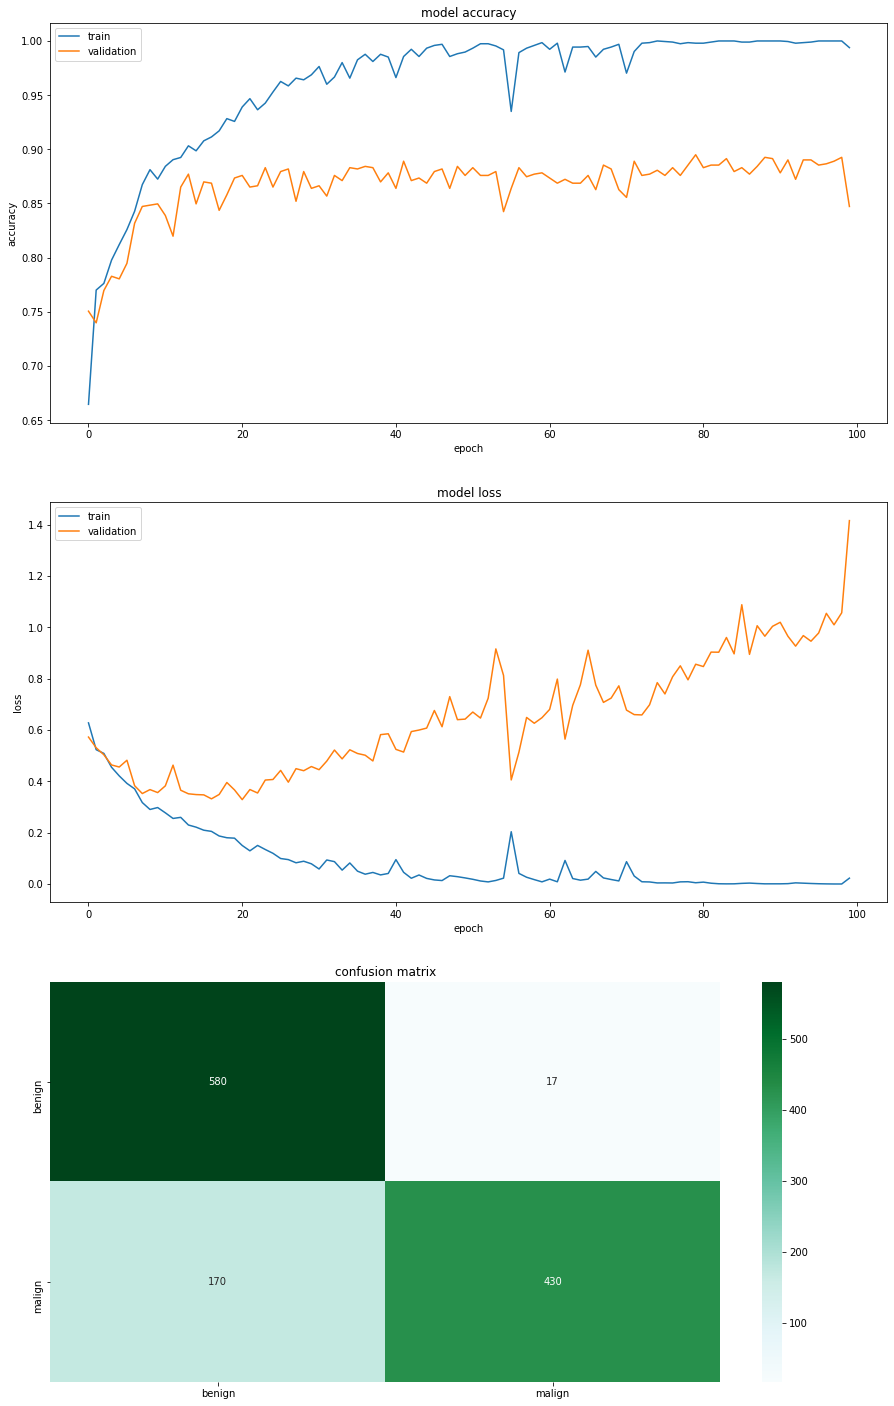

In [ ]:
class_names = ['benign', 'malign']

cm = pd.DataFrame(confusion_matrix(y_test, np.rint(y_Pred)), 
                  index = class_names,
                  columns = class_names)

metrics_values = [ [confusion_matrix(y_test, np.rint(y_Pred))],
            [accuracy_score(y_test, np.rint(y_Pred))],
            [recall_score(y_test, np.rint(y_Pred), average=None)],
            [precision_score(y_test, np.rint(y_Pred), average=None)]]

fig, ax = plt.subplots(3, 1, figsize = (15, 25))

ax[0].plot(result.history['acc'])
ax[0].plot(result.history['val_acc'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'validation'], loc='upper left')

ax[1].plot(result.history['loss'])
ax[1].plot(result.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'validation'], loc='upper left')

hm = sn.heatmap(cm, annot=True, fmt='.4g', cmap='BuGn', ax=ax[2])
hm.set_title("confusion matrix")

plt.show()

In [ ]:
path_to_save_model = ""
model.save(path_to_save_model)